In [20]:
import numpy as np
import cv2
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread('/content/Fruits.png')

In [4]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [26]:
resized_image = cv2.resize(image_rgb, (128,64))
flattened_image = resized_image.reshape((-1, 3))

In [27]:
r_resized = image_rgb[:,:,0].flatten()
g_resized = image_rgb[:,:,1].flatten()
b_resized = image_rgb[:,:,2].flatten()


In [28]:
data_resized = np.stack((r_resized, g_resized, b_resized), axis=1)

In [29]:
mean_shift = MeanShift(bin_seeding=True)
labels_resized = mean_shift.fit_predict(flattened_image)

In [30]:
segmented_image = labels_resized.reshape(resized_image.shape[:2])

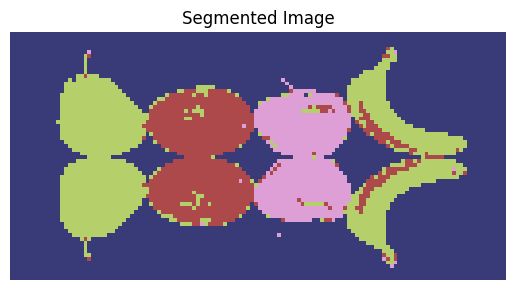

In [31]:
plt.imshow(segmented_image, cmap='tab20b')
plt.axis('off')
plt.title("Segmented Image")
plt.show()


TASK 2

In [39]:
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu


image = cv2.imread('/content/Fruits.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = rgb2gray(image_rgb)

ImportError: ignored

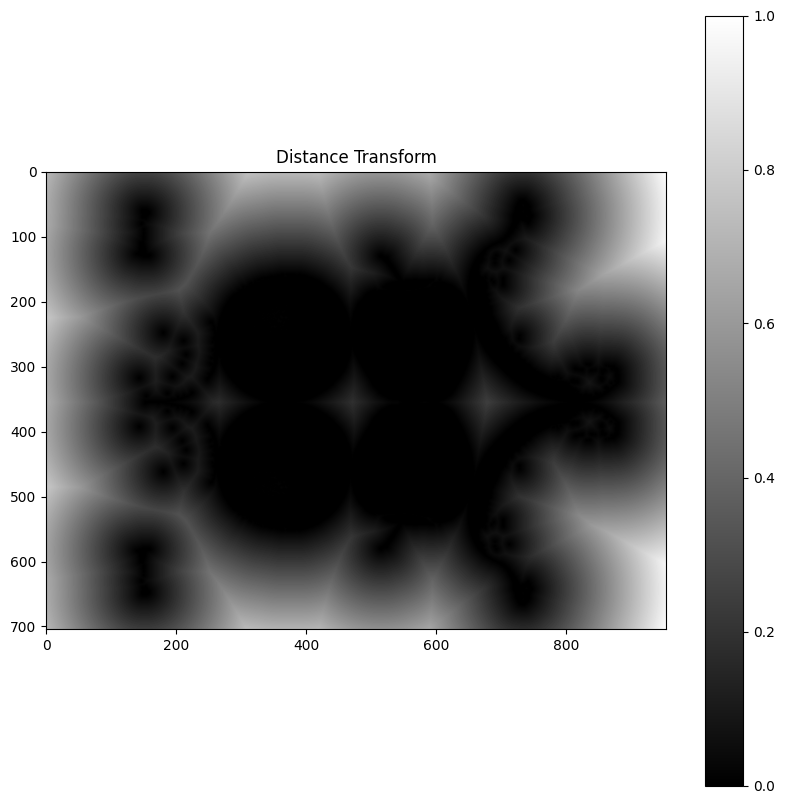

In [43]:
from scipy.ndimage import distance_transform_edt

thresh = threshold_otsu(gray_image)
binary_image = gray_image > thresh

distance = distance_transform_edt(binary_image)


normalized_distance = (distance - distance.min()) / (distance.max() - distance.min())


plt.figure(figsize=(10, 10))
plt.imshow(normalized_distance, cmap='gray')
plt.title('Distance Transform')
plt.colorbar()
plt.show()


<ipython-input-44-a7529a798aaa>:8: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_maxi = peak_local_max(normalized_distance, indices=False, footprint=np.ones((3, 3)), labels=binary_image)


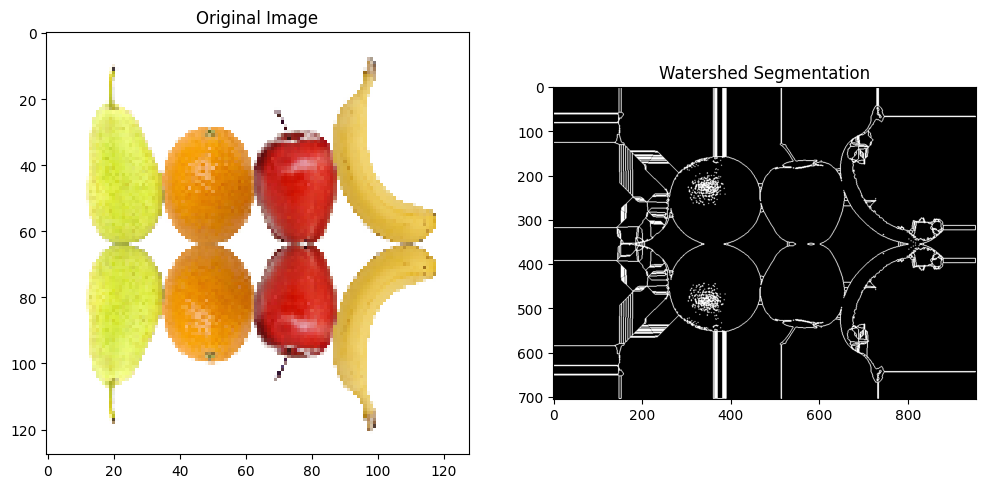

In [44]:
from skimage.feature import peak_local_max
from skimage.measure import label
from skimage.segmentation import watershed, find_boundaries
from skimage.segmentation import find_boundaries

resized_image = cv2.resize(image_rgb, (128,128))

local_maxi = peak_local_max(normalized_distance, indices=False, footprint=np.ones((3, 3)), labels=binary_image)
markers = label(local_maxi)

labels_ws = watershed(-normalized_distance, markers, mask=binary_image)


boundaries = find_boundaries(labels_ws)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)try:
    segmented_image = np.zeros(resized_image.shape, dtype=np.uint8)
    for region_id in np.unique(labels_ws):
        if region_id == 0:
            continue
        else:
            mean_color = resized_image[labels_ws == region_id].mean(axis=0)
            segmented_image[labels_ws == region_id] = mean_color

    # Visualize
    plt.figure(figsize=(8, 8))
    plt.imshow(segmented_image)
    plt.title('Watershed Segmented Image')
    plt.axis('off')
    plt.show()

except Exception as e:
    error_message = str(e)

error_message if 'error_message' in locals() else "Segmentation completed successfully."

plt.imshow(resized_image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(boundaries, cmap='gray')
plt.title('Watershed Segmentation')
plt.show()


<ipython-input-52-b7ae3e11ac8c>:1: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_maxi_resized = peak_local_max(normalized_distance_resized, indices=False, footprint=np.ones((3, 3)), labels=binary_resized)


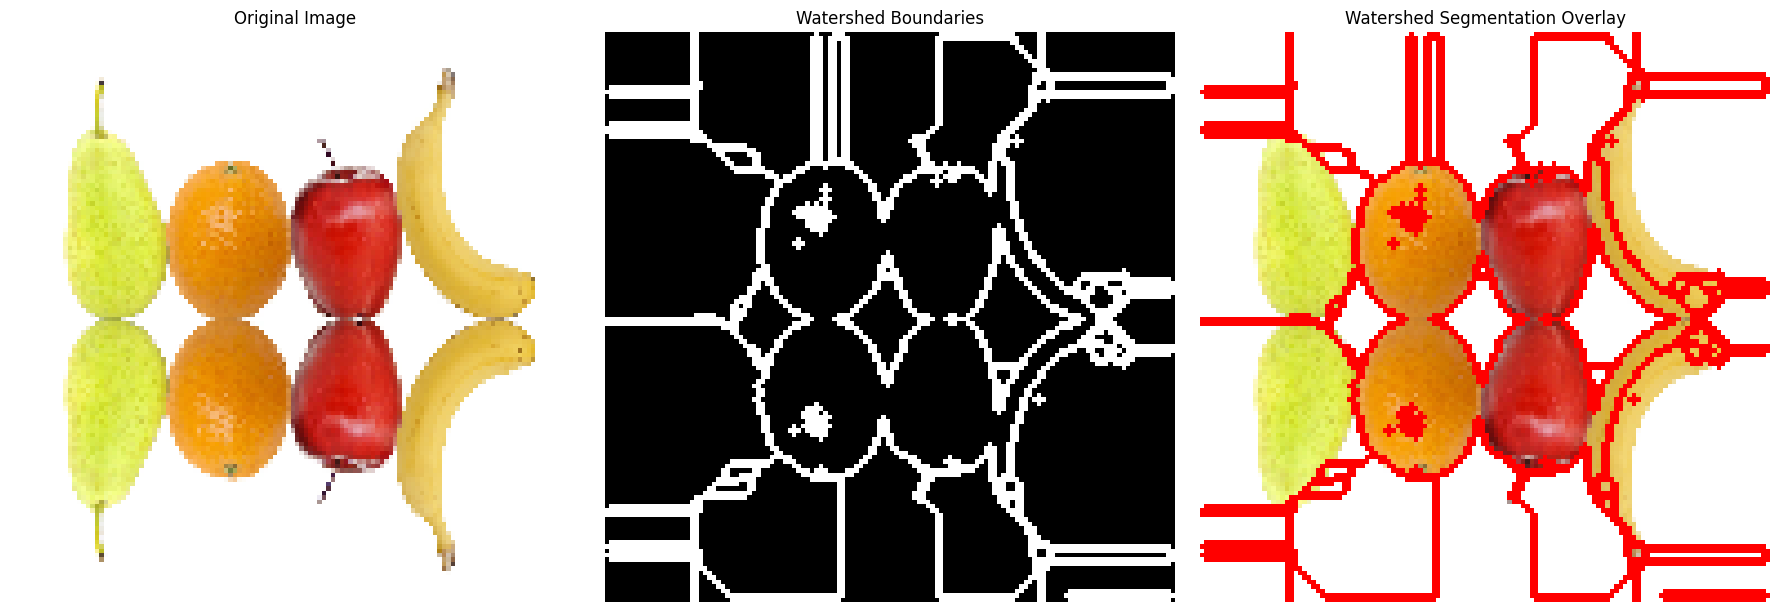

In [52]:
local_maxi_resized = peak_local_max(normalized_distance_resized, indices=False, footprint=np.ones((3, 3)), labels=binary_resized)
markers_resized = label(local_maxi_resized)

labels_ws_resized = watershed(-normalized_distance_resized, markers_resized, mask=binary_resized)

boundaries_resized = find_boundaries(labels_ws_resized)
segmented_overlay_resized = resized_image.copy()
segmented_overlay_resized[boundaries_resized] = [255, 0, 0]


plt.figure(figsize=(18, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(resized_image)
plt.title('Original Image')
plt.axis('off')

# Watershed Boundaries
plt.subplot(1, 3, 2)
plt.imshow(boundaries_resized, cmap='gray')
plt.title('Watershed Boundaries')
plt.axis('off')

# Watershed Segmentation Overlay
plt.subplot(1, 3, 3)
plt.imshow(segmented_overlay_resized)
plt.title('Watershed Segmentation Overlay')
plt.axis('off')

plt.tight_layout()
plt.show()


Task 3

MeanShift


In [77]:
import numpy as np
from skimage import io, color, segmentation

image = io.imread("/content/Fruits.png")
mask = io.imread("/content/Mask8.png", as_gray=True)

mean_shift_segmented = segmentation.quickshift(image, kernel_size=4, max_dist=200, ratio=0.2)
segmented_image = color.label2rgb(mean_shift_segmented, image, kind='avg')

segmented_gray = color.rgb2gray(segmented_image)
threshold = np.mean(segmented_gray)
segmented_binary = segmented_gray > threshold
mask_binary = mask > 0.5

#JSC
def jaccard_similarity_coefficient(A, B):
    intersection = np.logical_and(A, B)
    union = np.logical_or(A, B)
    return intersection.sum() / float(union.sum())

jsc_values = []
unique_regions = np.unique(segmented_binary)

for region in unique_regions:
    region_mask = segmented_binary == region
    jsc = jaccard_similarity_coefficient(region_mask, mask_binary)
    jsc_values.append(jsc)

max_jsc_value = max(jsc_values)
max_jsc_region = unique_regions[jsc_values.index(max_jsc_value)]

print(f"The region with label {max_jsc_region} has the largest JSC of {max_jsc_value:.4f} with the given mask.")


The region with label False has the largest JSC of 0.1171 with the given mask.


Watershed

In [78]:
import numpy as np
from skimage import io, transform
from skimage.feature import peak_local_max
from skimage.measure import label
from skimage.segmentation import watershed, find_boundaries


mask = io.imread("/content/Mask8.png", as_gray=True)
mask_resized = transform.resize(mask, (128, 128))
mask_binary_resized = mask_resized > 0.5

#JSC
def jaccard_similarity_coefficient(A, B):
    intersection = np.logical_and(A, B)
    union = np.logical_or(A, B)
    return intersection.sum() / float(union.sum())

jsc_values = []
unique_regions = np.unique(labels_ws_resized)

for region in unique_regions:
    if region == 0:
        continue
    region_mask = labels_ws_resized == region
    jsc = jaccard_similarity_coefficient(region_mask, mask_binary_resized)
    jsc_values.append(jsc)

max_jsc_value = max(jsc_values)
max_jsc_region = unique_regions[jsc_values.index(max_jsc_value) + 1]  # +1 to account for skipping background

print(f"The region with label {max_jsc_region} has the largest JSC of {max_jsc_value:.4f} with the given mask.")


The region with label 71 has the largest JSC of 0.1450 with the given mask.


JSC	MeanShift	Watershed

Mask1	0.0651	0.5094

Mask2	0.1593	0.0062

Mask3	0.1391	0.0054

Mask4	0.1187	0.1653

Mask5	0.0706	0.5070

Mask6	0.1594	0.0172

Mask7	0.1370	0.0040

Mask8	0.1171	0.1450

Average	0.1207	0.1699






The Jaccard similarity coefficient (JSC) is a measure of similarity. A higher JSC value means the segmented image is more similar to the mask, and thus, the segmentation method is performing better.

Watershed, with an average JSC of 0.1699, performs better than MeanShift, which has an average JSC of
0.1207.

The Watershed method seems to match the masks better than the MeanShift method based on the given numbers. This might be because Watershed is good at finding touching objects in an image, while MeanShift might get confused when things are close together. To get even better results, we can try things like smoothing the image before segmenting or cleaning up the segmented image after by removing small specks or filling in tiny gaps.

